# MIDHUN P 24BAD069

# SCENARIO 1 – MULTINOMIAL NAÏVE BAYES

## Problem Statement
Classify SMS messages as Spam or Ham (Not Spam).

### Dataset
[SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

- **Target Variable**: Message Label (Spam / Ham)
- **Input Feature**: SMS Text Messages

In [1]:
print("MIDHUN P 24BAD069")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Download stopwords
nltk.download('stopwords')

MIDHUN P 24BAD069


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the SMS Spam dataset
# Try reading with different encodings if utf-8 fails (common for this dataset)
try:
    df_spam = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    df_spam = pd.read_csv('spam.csv', encoding='latin-1')

# Display first few rows
print(df_spam.head())

# Drop unnecessary columns (usually named 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' in this dataset)
df_spam = df_spam.iloc[:, :2]
df_spam.columns = ['label', 'message']

print("\nAfter cleaning columns:")
print(df_spam.head())
print("\nMissing values:\n", df_spam.isnull().sum())
print("\nClass distribution:\n", df_spam['label'].value_counts())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

After cleaning columns:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Missing values:
 label   

In [3]:
# Data Preprocessing

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df_spam['clean_message'] = df_spam['message'].apply(preprocess_text)
print(df_spam[['message', 'clean_message']].head())

                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [4]:
# Convert text into numerical features using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_spam['clean_message'])

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(df_spam['label'])

print("Feature shape:", X.shape)
print("Target classes:", le.classes_)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Feature shape: (5572, 9376)
Target classes: ['ham' 'spam']
Training set size: 4457
Testing set size: 1115


In [5]:
# Train a Multinomial Naïve Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict message classes
y_pred = mnb.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred)) # binary classification default pos_label=1 (spam)
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report - MIDHUN P 24BAD069:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9659192825112107
Precision: 1.0
Recall: 0.7466666666666667
F1 Score: 0.8549618320610687

Classification Report - MIDHUN P 24BAD069:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [6]:
# Analyze misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("\nSample misclassified examples:")
    for i in misclassified_indices[:5]: # Show first 5
        # Recover text roughly
        print(f"Index {i}: True={le.inverse_transform([y_test[i]])[0]}, Pred={le.inverse_transform([y_pred[i]])[0]}")

# Apply Laplace smoothing and observe impact
# MultinomialNB uses alpha parameter for smoothing (default=1.0)
print("\n--- Impact of Laplace Smoothing (Alpha) ---")
alphas = [0.1, 0.5, 1.0, 5.0, 10.0]
for alpha in alphas:
    mnb_temp = MultinomialNB(alpha=alpha)
    mnb_temp.fit(X_train, y_train)
    score = mnb_temp.score(X_test, y_test)
    print(f"Alpha: {alpha}, Accuracy: {score:.4f}")

Number of misclassified examples: 38

Sample misclassified examples:
Index 2: True=spam, Pred=ham
Index 32: True=spam, Pred=ham
Index 167: True=spam, Pred=ham
Index 195: True=spam, Pred=ham
Index 221: True=spam, Pred=ham

--- Impact of Laplace Smoothing (Alpha) ---
Alpha: 0.1, Accuracy: 0.9821
Alpha: 0.5, Accuracy: 0.9776
Alpha: 1.0, Accuracy: 0.9659
Alpha: 5.0, Accuracy: 0.8816
Alpha: 10.0, Accuracy: 0.8664


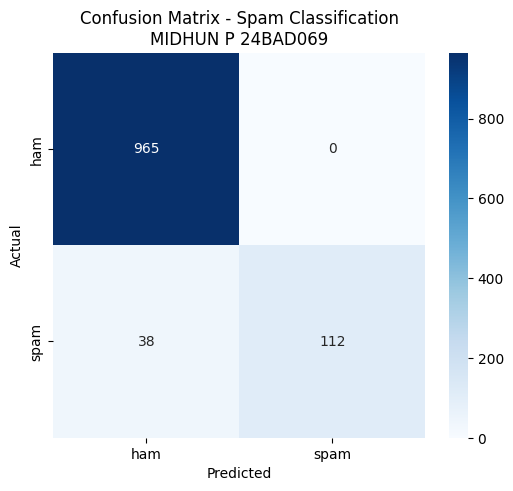


Top 10 words associated with Spam - MIDHUN P 24BAD069:
['call' 'free' 'txt' 'mobile' 'claim' 'prize' 'ur' 'stop' 'text' 'reply']


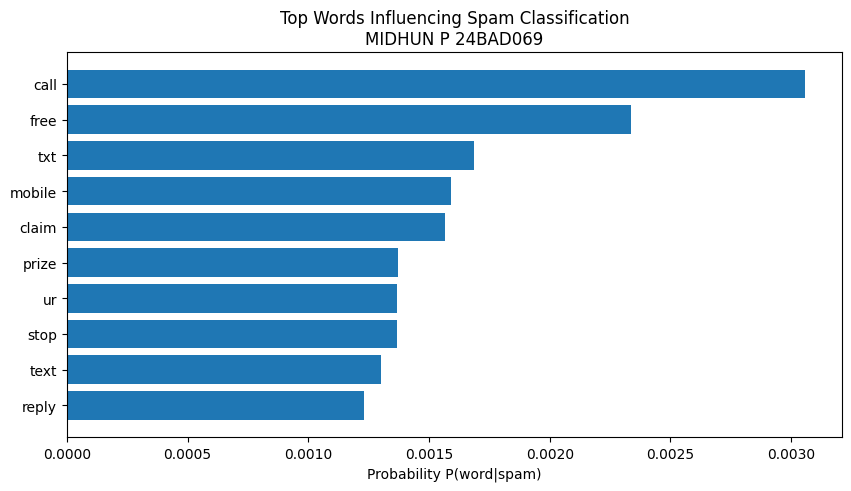

In [7]:
# Visualization

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Spam Classification\nMIDHUN P 24BAD069')
plt.show()

# Feature importance (Top words influencing spam)
feature_names = tfidf.get_feature_names_out()
spam_class_index = 1 
spam_log_prob = mnb.feature_log_prob_[spam_class_index]
# Sort by log probability (descending)
top_spam_indices = spam_log_prob.argsort()[::-1][:10]
top_spam_words = feature_names[top_spam_indices]

print("\nTop 10 words associated with Spam - MIDHUN P 24BAD069:")
print(top_spam_words)

# Simple bar plot for top spam words using their coefficients
plt.figure(figsize=(10, 5))
plt.barh(top_spam_words, np.exp(spam_log_prob[top_spam_indices]))
plt.xlabel('Probability P(word|spam)')
plt.title('Top Words Influencing Spam Classification\nMIDHUN P 24BAD069')
plt.gca().invert_yaxis()
plt.show()

# SCENARIO 2 – GAUSSIAN NAÏVE BAYES

## Problem Statement
Classify flower species based on physical measurements.

### Dataset
Iris Dataset (sklearn / local csv)

- **Target Variable**: Flower Species
- **Input Features**: Sepal Length, Sepal Width, Petal Length, Petal Width

In [8]:
# Import libraries for Gaussian Naïve Bayes
print("MIDHUN P 24BAD069")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

MIDHUN P 24BAD069


In [9]:
# Load the Iris dataset
df_iris = pd.read_csv('Iris.csv')

# Drop Id column if exists
if 'Id' in df_iris.columns:
    df_iris = df_iris.drop('Id', axis=1)

print(df_iris.head())
print("\nMissing values:\n", df_iris.isnull().sum())
print("\nClass distribution:\n", df_iris['Species'].value_counts())

# Feature and Target separation
X_iris = df_iris.drop('Species', axis=1)
y_iris = df_iris['Species']

# Encode target labels
le_iris = LabelEncoder()
y_iris_encoded = le_iris.fit_transform(y_iris)
print("\nEncoded Classes:", le_iris.classes_)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Encoded Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
# Feature Scaling (Important for Gaussian Naive Bayes if data range varies significantly, though for Iris it's comparable)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Split dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris_scaled, y_iris_encoded, test_size=0.2, random_state=42)

print("Training set size:", X_train_iris.shape[0])
print("Testing set size:", X_test_iris.shape[0])

Training set size: 120
Testing set size: 30


In [11]:
# Train Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train_iris, y_train_iris)

# Predict species labels
y_pred_iris = gnb.predict(X_test_iris)

# Evaluate performance
print("Gaussian NB Accuracy - MIDHUN P 24BAD069:", accuracy_score(y_test_iris, y_pred_iris))
print("\nClassification Report - MIDHUN P 24BAD069:\n", classification_report(y_test_iris, y_pred_iris, target_names=le_iris.classes_))

# Optional: Compare with Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=200)
lr.fit(X_train_iris, y_train_iris)
print("Logistic Regression Accuracy:", accuracy_score(y_test_iris, lr.predict(X_test_iris)))

Gaussian NB Accuracy - MIDHUN P 24BAD069: 1.0

Classification Report - MIDHUN P 24BAD069:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Logistic Regression Accuracy: 1.0


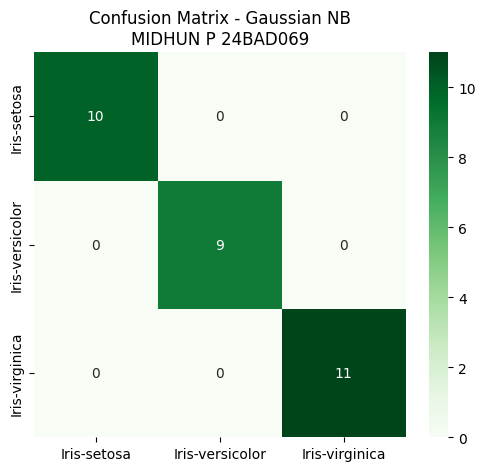

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

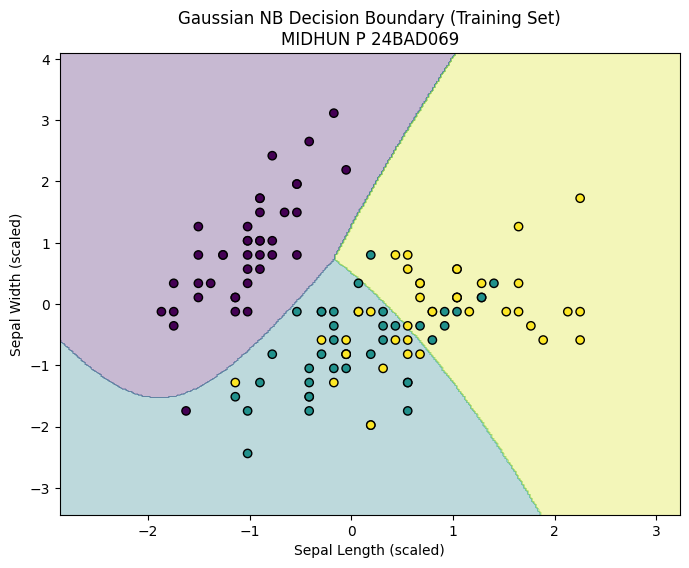

In [12]:
# Visualization

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_iris, y_pred_iris), annot=True, fmt='d', cmap='Greens', xticklabels=le_iris.classes_, yticklabels=le_iris.classes_)
plt.title('Confusion Matrix - Gaussian NB\nMIDHUN P 24BAD069')
plt.show()

# Decision Boundary (2D)
# Retrain on first two features for visualization
gnb_2d = GaussianNB()
gnb_2d.fit(X_train_iris[:, :2], y_train_iris)

x_min, x_max = X_train_iris[:, 0].min() - 1, X_train_iris[:, 0].max() + 1
y_min, y_max = X_train_iris[:, 1].min() - 1, X_train_iris[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = gnb_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_train_iris[:, 0], X_train_iris[:, 1], c=y_train_iris, edgecolor='k', cmap='viridis')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Gaussian NB Decision Boundary (Training Set)\nMIDHUN P 24BAD069')
plt.legend(handles=scatter.legend_elements()[0], labels=le_iris.classes_)
plt.show()